In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine

In [38]:
class AdalineGD:

    def __init__(self, eta, n_iter): # 초기화 함수 : 객체 생성할 때 자동 호출
        self.eta = eta          # 가중치 갱신 비율, 학습률
        self.n_iter = n_iter    # 학습 반복 횟수

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0] # x1*w1 + x2*w2 + ... + xn*wn + w0

    def activation(self, X):
        return self.net_input(X) # 항등함수 : 입력값 그대로 활성화 출력
    
    def predict(self, X):
        output = self.activation(X)
        return np.where(output > 0, 1, -1)
    
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1] + 1) # X.shape : 2차원 배열의 열 갯수
        self.cost = [] # 오차 배열 만들기 (오차 로그용)

        for idx in np.arange(self.n_iter): # 학습 반복
            output = self.activation(X)
            errors = y - output  # 오차 계산 (실제값 - 출력값)            
            delta = self.eta * X.T.dot(errors) # 학습률 * 기울기(미분)
            self.w[1:] += delta     # 가중치 업데이트
            self.w[0] += self.eta * errors.sum()      # 가중치(편향) 업데이트
            self.cost.append( (errors**2).sum() )

        return self


In [5]:
iris_dataset = load_iris()
X = iris_dataset['data'][:100]
y = iris_dataset['target'][:100]
y = np.where(y == 0, 1, -1)

In [48]:
model = AdalineGD(0.00001, n_iter=5000) # AdalineGD 인스턴스(객체) 만들기
model.fit(X, y)

In [49]:
model.w, model.cost[:10], model.cost[-10:]

(array([ 0.07055571,  0.10562385,  0.35424752, -0.54202746, -0.25106858]),
 [np.float64(100.0),
  np.float64(99.48959321565404),
  np.float64(98.99539307141738),
  np.float64(98.51593613603924),
  np.float64(98.0499022784305),
  np.float64(97.59610058950068),
  np.float64(97.15345668724511),
  np.float64(96.72100126916885),
  np.float64(96.29785978949086),
  np.float64(95.88324315061244)],
 [np.float64(3.8475478914252146),
  np.float64(3.847542279317196),
  np.float64(3.847536667498966),
  np.float64(3.847531055970474),
  np.float64(3.8475254447316627),
  np.float64(3.847519833782483),
  np.float64(3.8475142231228863),
  np.float64(3.847508612752813),
  np.float64(3.847503002672215),
  np.float64(3.847497392881042)])

In [47]:
correct = []
for idx in range(X.shape[0]):
    pv = model.predict(X[idx])
    correct.append(pv == y[idx])

print("Accuracty : {0}".format( np.mean(correct) ) )


Accuracty : 0.5


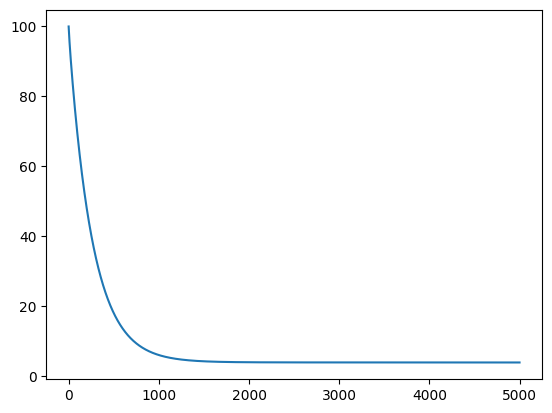

In [44]:
plt.plot(np.arange(len(model.cost)), model.cost)
# plt.plot(np.arange(0, len(model.cost[-1000:])), model.cost[-1000:])
plt.show()